# Explore here

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from pickle import dump


In [68]:
#Step 1: LOADING THE DATASET

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
#Step 2: PERFOMING A FULL EDA
#Obtaining information about data types and non-null values
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [70]:
# Eliminating irrelevant information

data.drop(["Pregnancies", "SkinThickness"], axis = 1, inplace = True)
data.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


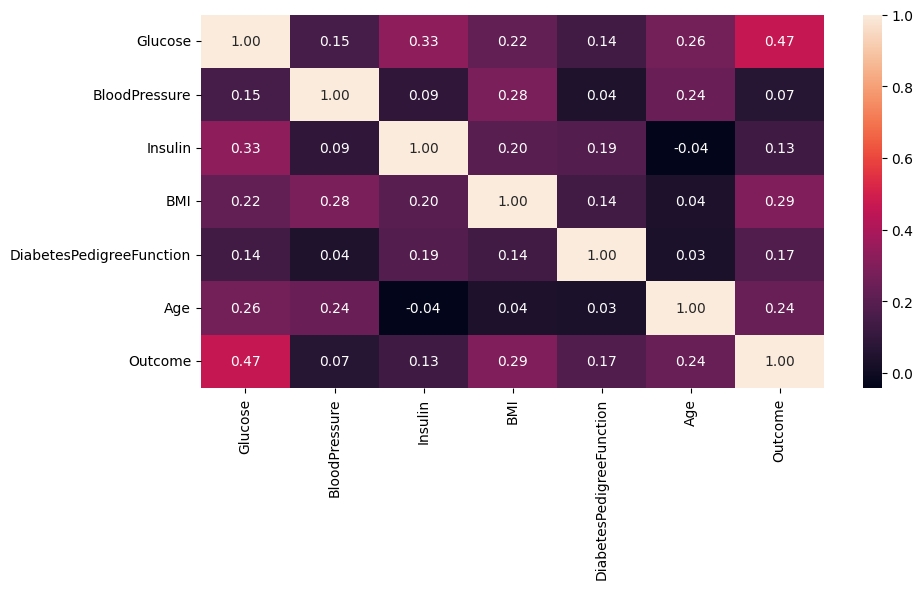

In [71]:
#Correlation analysis
fig, axis = plt.subplots(figsize = (10, 6))
sns.heatmap(data[["Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

The correlation analysis shows a direct relationship between the level of glucose and the diabetes. This does have sense because in people who have diabetes, glucose tends to build up in the bloodstream. Other variables, such as the body mass and the age, may also affect the posibility of having the diabetes. In addition, there is a relationship between the blood pressure and the age, the insuline and the glucose, the body mass and the blood pressure, which makes a lot of sense. The rest of the correlations are weak.

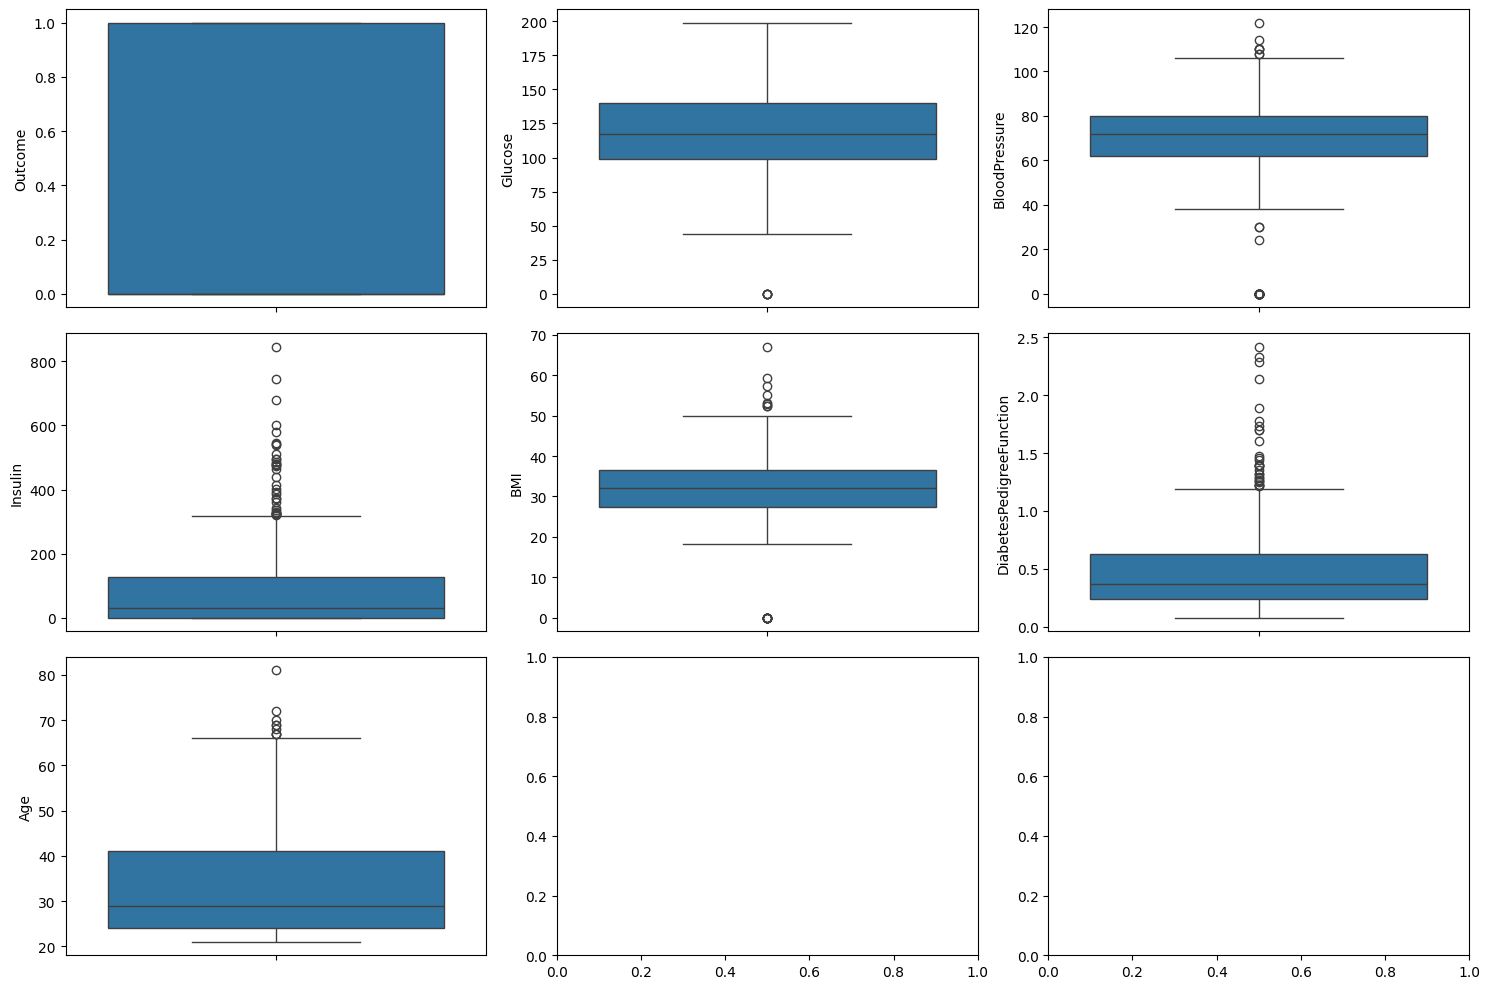

In [72]:
#Outliers
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "Outcome")
sns.boxplot(ax = axis[0, 1], data = data, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = data, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = data, y = "Insulin")
sns.boxplot(ax = axis[1, 1], data = data, y = "BMI")
sns.boxplot(ax = axis[1, 2], data = data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 0], data = data, y = "Age")

plt.tight_layout()

plt.show()

We can easily determine that the variables affected by outliers are Insulin and DiabetesPedigreeFunction. We should set some upper and lower bounds to determine whether a data point should be considered an outlier.

In [73]:
insulin_stats = data["Insulin"].describe()
insulin_stats

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [74]:
insulin_iqr = insulin_stats["75%"] - insulin_stats["25%"]
upper_limit = insulin_stats["75%"] + 1.5 * insulin_iqr
lower_limit = insulin_stats["25%"] - 1.5 * insulin_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(insulin_iqr, 2)}")

The upper and lower limits for finding outliers are 318.12 and -190.88, with an interquartile range of 127.25


In [75]:
DiabetesPedigreeFunction_stats = data["DiabetesPedigreeFunction"].describe()
DiabetesPedigreeFunction_stats

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [76]:
DiabetesPedigreeFunction_iqr = DiabetesPedigreeFunction_stats["75%"] - DiabetesPedigreeFunction_stats["25%"]
upper_limit = DiabetesPedigreeFunction_stats["75%"] + 1.5 * DiabetesPedigreeFunction_iqr
lower_limit = DiabetesPedigreeFunction_stats["25%"] - 1.5 * DiabetesPedigreeFunction_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(DiabetesPedigreeFunction_iqr, 2)}")

The upper and lower limits for finding outliers are 1.2 and -0.33, with an interquartile range of 0.38


Although these variables have outliers, this is a real, correct data, that may influence the outcome (most people with high DPF and insuline has diabetes), so thus, it is better to keep the outliers.

In [77]:
# Dividing the dataset into training and test samples
from sklearn.model_selection import train_test_split

X = data.drop("Outcome", axis = 1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
60,84,0,0,0.0,0.304,21
618,112,82,0,28.2,1.282,50
346,139,46,83,28.7,0.654,22
294,161,50,0,21.9,0.254,65
231,134,80,370,46.2,0.238,46


In [78]:
X_test.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
668,98,58,190,34.0,0.430,43
324,112,75,0,35.7,0.148,21
624,108,64,0,30.8,0.158,21
690,107,80,0,24.6,0.856,34
473,136,90,0,29.9,0.210,50


<Axes: >

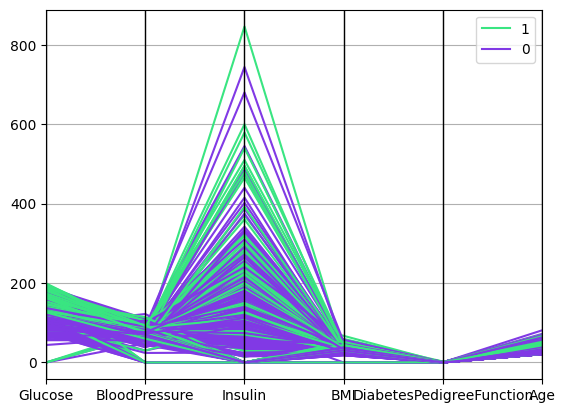

In [79]:
#Step 3: BUILDING A DECISION TREE
data = X
data["Outcome"] = y

pd.plotting.parallel_coordinates(data, "Outcome", color = ("#39E581", "#8139E5"))

In [80]:
#Model initialization and training

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

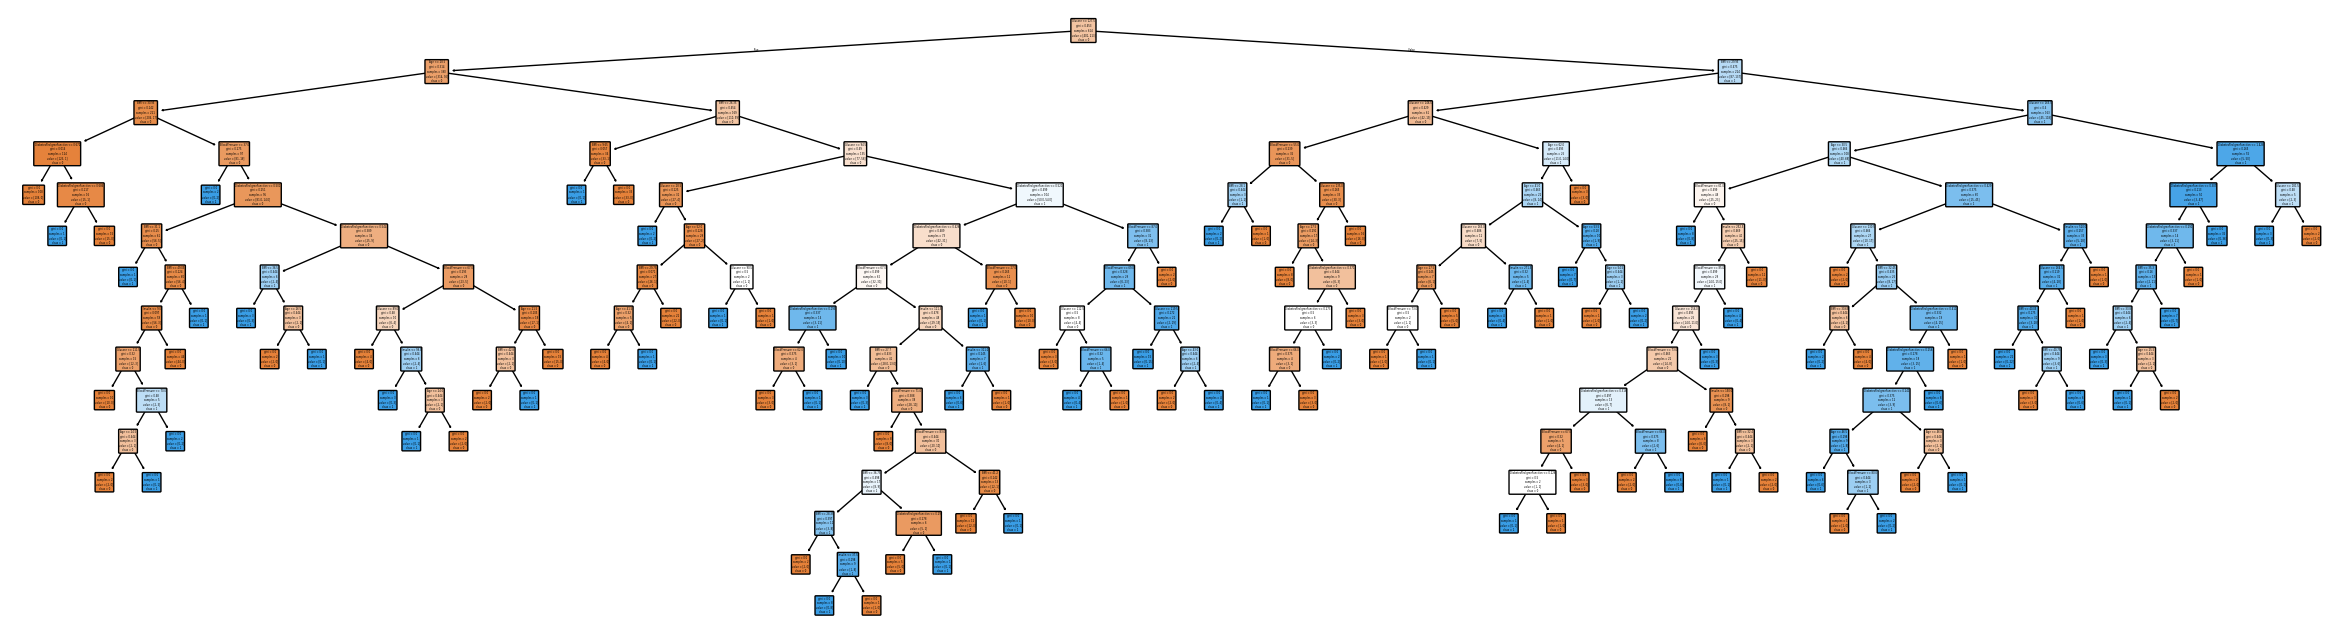

In [81]:
fig = plt.figure(figsize=(30,8))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True, rounded=True)

plt.show()

In [90]:
#Model prediction
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [92]:
#Metrics
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



In [112]:
#Step 4: OPTIMIZING THE PREVIOUS MODEL
from sklearn.model_selection import GridSearchCV

hyperparam_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "criterion": ["entropy"]
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), hyperparam_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [113]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [114]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [115]:
#Evaluating Model Performance
y_pred = best_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82        99
           1       0.68      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



The model performs quite well on class 0 with high precision (83%) and recall (82%), however, it has lower precision (68%) and recall (69%) for class 1, indicating more difficulty in correctly predicting class 1 instances.
The accuracy of 77% indicates a good performance overall, but the lower recall and precision for class 1 indicate that performance is not balanced across classes

In [116]:
#Step 5: SAVING THE MODEL
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))